Aula 4 - Capítulo 3: Geração de Potência

1) Revisão da Aula Passada: Geometria Solar, Clearsky, Modelos de Decomposição e Transposição (Começar a Modelagem com o POA)

2) Cálculo da Temperatura do Módulo (Diferentes Modelos de Temperatura do Dispositivo FV)

3) Cálculo da Potência Gerada a Partir de Irradiância POA e Temperatura da Célula FV (Comparar os Cenários com e Sem Perdas de Temperatura)

4) Calcular a Potência Gerada de um Sistema usando o modelo do PVWatts

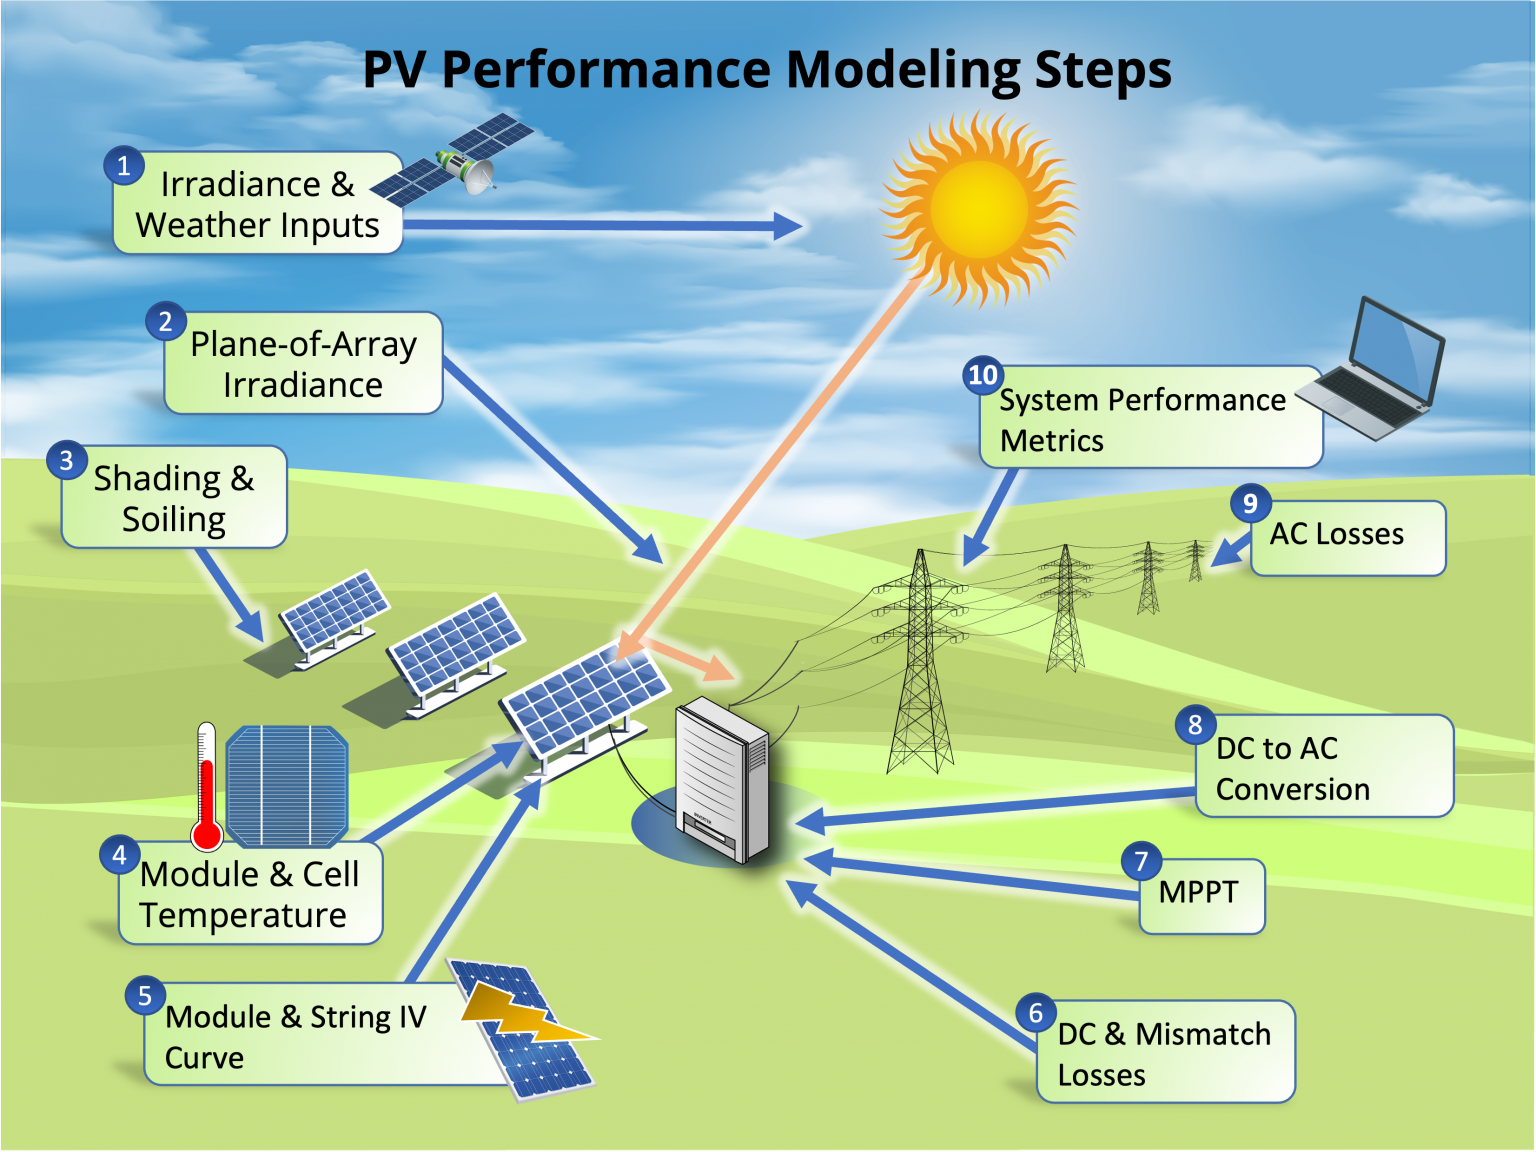

In [65]:
#Vamos importar as bibliotecas necessárias para a aula
import pvlib
from pvlib import location, irradiance, pvsystem
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Módulo Usado para a Aula

In [66]:
#Módulo de 330 Wp
Vmp = 37.8 #Voltage at Maximum Power
Imp = 8.74 #Current at Maximum Power
Voc = 46.9 #Open-Circuit Voltage
Isc = 9.14 #Short-Circuit Current
alpha = 0.06*Isc/100 # Alpha_isc (%/A) * Short-Circuit Current
beta = (-0.31)*Voc/100 # Beta_voc (%/V) * Open-Circuit Voltage
gamma = -0.0038
Ns = 72 #Number of PV Cells in Series
A_c = 1.940352 #The Area of PV Module's Surface
eff_ref = 0.1701

Potência Gerada a Partir dos Dados de POA e Temperatura da Célula FV Calculados

In [67]:
#Import Data
#Localização da Universidade de Oregon

df_weather = pvlib.iotools.read_midc_raw_data_from_nrel('UOSMRL',               # Station id
                                                    pd.Timestamp('20230601'),   # Start date YYYYMMDD
                                                    pd.Timestamp('20230607'))   # End date  YYYYMMDD

df_weather.head(3)

Unnamed: 0  Year  DOY  PST  SR20 Temp [deg C]  \
2023-06-01 00:00:00-08:00           0  2023  152    0              10.63   
2023-06-01 00:01:00-08:00           0  2023  152    1              10.63   
2023-06-01 00:02:00-08:00           0  2023  152    2              10.63   

                           Direct NIP [W/m^2]  Diffuse [W/m^2]  \
2023-06-01 00:00:00-08:00               13.04           -1.298   
2023-06-01 00:01:00-08:00               13.05           -1.368   
2023-06-01 00:02:00-08:00               13.05           -1.394   

                           Global LI-200 [W/m^2]  Relative Humidity [%]  \
2023-06-01 00:00:00-08:00                  0.029                  70.71   
2023-06-01 00:01:00-08:00                  0.029                  70.84   
2023-06-01 00:02:00-08:00                  0.032                  70.75   

                           Air Temperature [deg C]  ...  CHP1 Temp [deg K]  \
2023-06-01 00:00:00-08:00                    10.86  ...              283.2   
2023-06-01 00:01:00-08:00                    10.82  ...              283.2   
2023-06-01 00:02:00-08:00                    10.82  ...              283.2   

                           CMP22 Temp [deg K]  \
2023-06-01 00:00:00-08:00               284.6   
2023-06-01 00:01:00-08:00               284.6   
2023-06-01 00:02:00-08:00               284.6   

                           Avg Wind Direction @ 10m [deg from N]  \
2023-06-01 00:00:00-08:00                                  306.1   
2023-06-01 00:01:00-08:00                                  307.9   
2023-06-01 00:02:00-08:00                                  323.3   

                           Zenith Angle [degrees]  Azimuth Angle [degrees]  \
2023-06-01 00:00:00-08:00               113.87990                357.44185   
2023-06-01 00:01:00-08:00               113.88743                357.69513   
2023-06-01 00:02:00-08:00               113.89417                357.94844   

                           Airmass  Solar Eclipse Shading  \
2023-06-01 00:00:00-08:00     -1.0                      0   
2023-06-01 00:01:00-08:00     -1.0                      0   
2023-06-01 00:02:00-08:00     -1.0                      0   

                           Direct SAMPA/Bird (calc) [W/m^2]  \
2023-06-01 00:00:00-08:00                               0.0   
2023-06-01 00:01:00-08:00                               0.0   
2023-06-01 00:02:00-08:00                               0.0   

                           Global SAMPA/Bird (calc) [W/m^2]  \
2023-06-01 00:00:00-08:00                               0.0   
2023-06-01 00:01:00-08:00                               0.0   
2023-06-01 00:02:00-08:00                               0.0   

                           Diffuse SAMPA/Bird (calc) [W/m^2]  
2023-06-01 00:00:00-08:00                                0.0  
2023-06-01 00:01:00-08:00                                0.0  
2023-06-01 00:02:00-08:00                                0.0  

[3 rows x 29 columns]

In [68]:
df_weather.keys()

Index(['Unnamed: 0', 'Year', 'DOY', 'PST', 'SR20 Temp [deg C]',
       'Direct NIP [W/m^2]', 'Diffuse [W/m^2]', 'Global LI-200 [W/m^2]',
       'Relative Humidity [%]', 'Air Temperature [deg C]',
       'Avg Wind Speed @ 10m [m/s]', 'Station Pressure [mBar]',
       'Downwelling IR PIR [W/m^2]', 'Instrument Net PIR [W/m^2]',
       'PIR Case Temp [deg K]', 'PIR Dome Temp [deg K]',
       'Logger Battery [VDC]', 'Direct CHP1 [W/m^2]', 'Global CMP22 [W/m^2]',
       'CHP1 Temp [deg K]', 'CMP22 Temp [deg K]',
       'Avg Wind Direction @ 10m [deg from N]', 'Zenith Angle [degrees]',
       'Azimuth Angle [degrees]', 'Airmass', 'Solar Eclipse Shading',
       'Direct SAMPA/Bird (calc) [W/m^2]', 'Global SAMPA/Bird (calc) [W/m^2]',
       'Diffuse SAMPA/Bird (calc) [W/m^2]'],
      dtype='object')

In [69]:
df_weather = df_weather[['Global CMP22 [W/m^2]', 'Diffuse [W/m^2]',
                         'Direct CHP1 [W/m^2]','Air Temperature [deg C]',
                         'Avg Wind Speed @ 10m [m/s]', 'Station Pressure [mBar]']]
# Rename the columns
df_weather.columns = ['ghi', 'dhi', 'dni', 'temp_air', 'wind_speed', 'air_pressure']

In [70]:
df_weather

ghi    dhi    dni  temp_air  wind_speed  \
2023-06-01 00:00:00-08:00 -0.412 -1.298  0.425     10.86       1.550   
2023-06-01 00:01:00-08:00 -0.412 -1.368  0.425     10.82       2.775   
2023-06-01 00:02:00-08:00 -0.400 -1.394  0.425     10.82       2.550   
2023-06-01 00:03:00-08:00 -0.389 -1.374  0.425     10.86       2.288   
2023-06-01 00:04:00-08:00 -0.374 -1.387  0.425     10.89       2.575   
...                          ...    ...    ...       ...         ...   
2023-06-07 23:55:00-08:00 -0.023 -0.952  0.425     12.81       0.938   
2023-06-07 23:56:00-08:00 -0.029 -1.015  0.425     12.96       0.337   
2023-06-07 23:57:00-08:00 -0.028 -0.965  0.425     12.94       1.100   
2023-06-07 23:58:00-08:00 -0.045 -1.134  0.425     13.00       1.075   
2023-06-07 23:59:00-08:00 -0.057 -1.162  0.425     13.04       1.188   

                           air_pressure  
2023-06-01 00:00:00-08:00       999.080  
2023-06-01 00:01:00-08:00       999.095  
2023-06-01 00:02:00-08:00       999.073  
2023-06-01 00:03:00-08:00       999.097  
2023-06-01 00:04:00-08:00       999.098  
...                                 ...  
2023-06-07 23:55:00-08:00       997.421  
2023-06-07 23:56:00-08:00       997.429  
2023-06-07 23:57:00-08:00       997.427  
2023-06-07 23:58:00-08:00       997.426  
2023-06-07 23:59:00-08:00       997.438  

[10080 rows x 6 columns]

<Axes: >

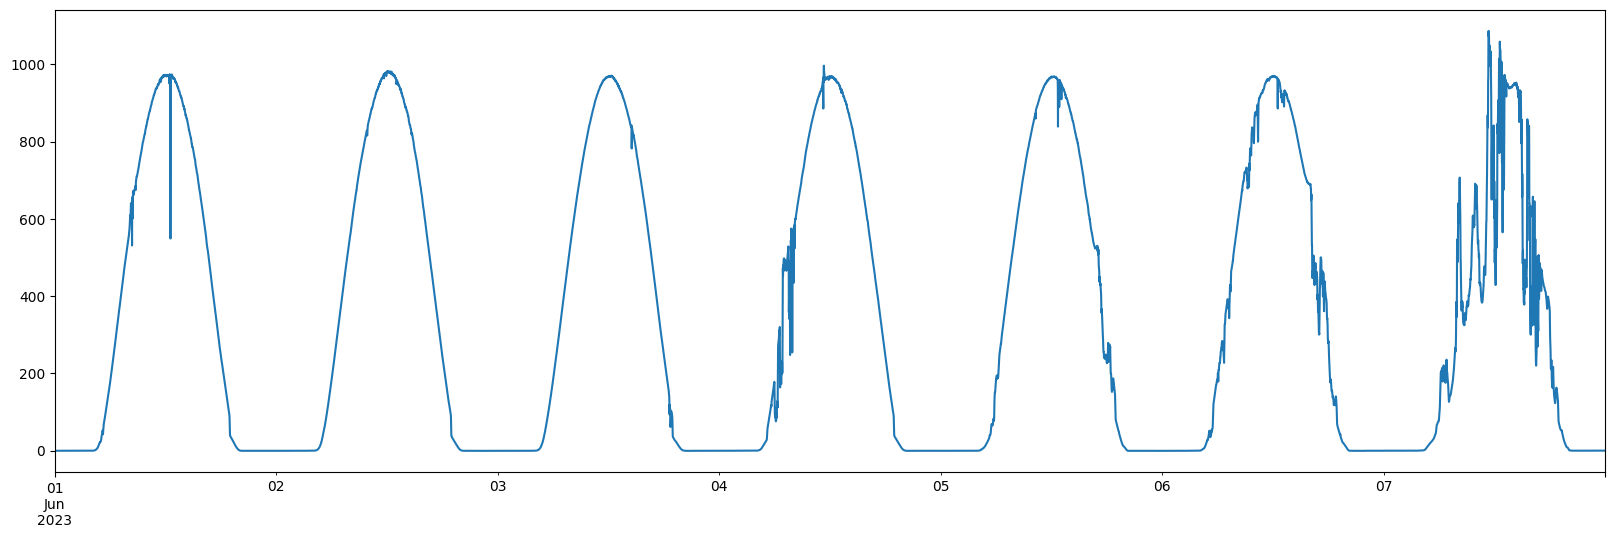

In [71]:
df_weather['ghi'].plot(figsize=(20,6))

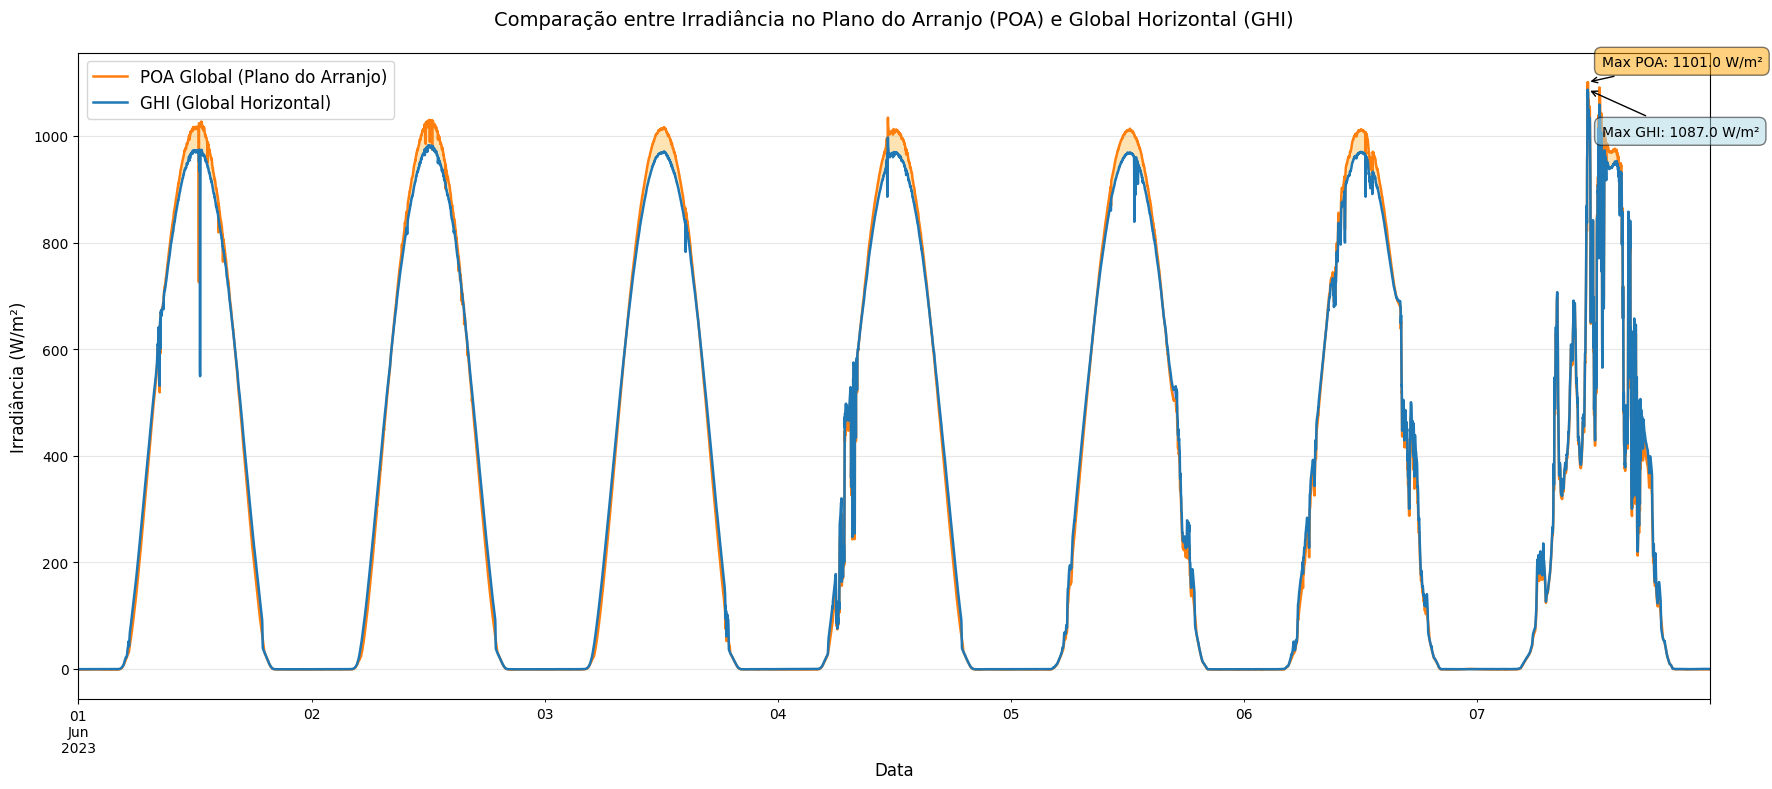


=== Métricas Comparativas ===
     Máximo (W/m²)  Média (W/m²)  Energia Total (kWh/m²)
POA        1100.97        349.78                 3525.76
GHI        1087.00        347.52                 3502.97


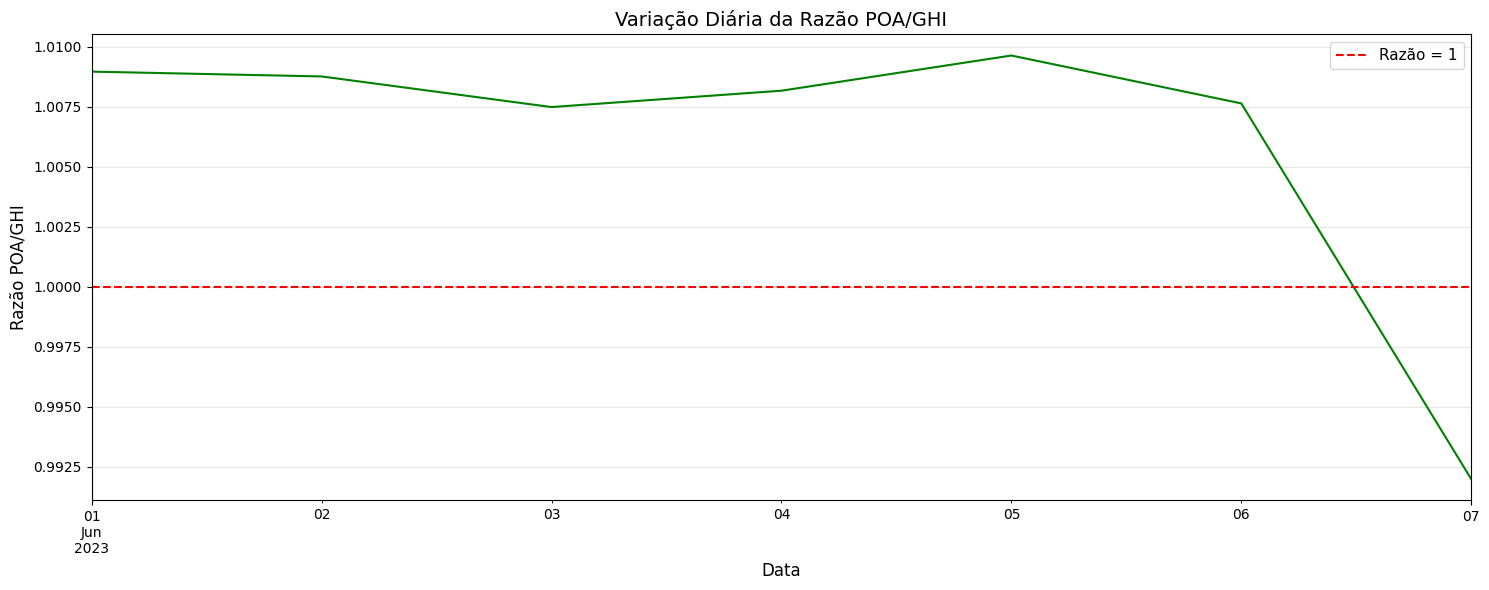

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

loc = pvlib.location.Location(
    latitude=44.0467,
    longitude=-123.0743,
    altitude=133.8,
    tz='UTC'  # ou 'America/Los_Angeles' (dependendo dos seus dados)
)

altitude=133.8
solpos = loc.get_solarposition(df_weather.index)

surface_tilt = 10
surface_azimuth = 180
solar_zenith = solpos['zenith']
solar_azimuth = solpos['azimuth']
dni = df_weather['dni']
ghi = df_weather['ghi']
dhi = df_weather['dhi']
dni_extra = pvlib.irradiance.get_extra_radiation(df_weather.index)
airmass_relative = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(altitude = altitude)
airmass = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure)

POA_Irradiance = pvlib.irradiance.get_total_irradiance(surface_tilt,
                                                  surface_azimuth,
                                                  solar_zenith,
                                                  solar_azimuth,
                                                  dni,
                                                  ghi,
                                                  dhi,
                                                  dni_extra=dni_extra,
                                                  airmass=airmass,
                                                  albedo=0.25,
                                                  surface_type=None,
                                                  model='isotropic', #'isotropic', 'klucher', 'haydavies', 'reindl', 'king', 'perez', 'perez-driesse'
                                                  model_perez='allsitescomposite1990') #Used only for Perez Model)
# Dados
poa = POA_Irradiance['poa_global']
ghi = df_weather['ghi']

# 1. Plot comparativo temporal aprimorado
plt.figure(figsize=(18, 8))
ax = plt.gca()

# Plot das séries com preenchimento entre elas
poa.plot(label='POA Global (Plano do Arranjo)', color='#FF7F0E', linewidth=1.8, ax=ax)
ghi.plot(label='GHI (Global Horizontal)', color='#1F77B4', linewidth=1.8, ax=ax)
plt.fill_between(poa.index, poa, ghi, where=(poa >= ghi),
                facecolor='orange', alpha=0.3, interpolate=True)
plt.fill_between(poa.index, poa, ghi, where=(poa < ghi),
                facecolor='blue', alpha=0.3, interpolate=True)

# Configurações do gráfico
plt.title('Comparação entre Irradiância no Plano do Arranjo (POA) e Global Horizontal (GHI)',
          fontsize=14, pad=20)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Irradiância (W/m²)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Adicionando anotações de valores máximos
max_poa = poa.max()
max_ghi = ghi.max()
plt.annotate(f'Max POA: {max_poa:.1f} W/m²',
             xy=(poa.idxmax(), max_poa), xytext=(10, 10),
             textcoords='offset points', ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Max GHI: {max_ghi:.1f} W/m²',
             xy=(ghi.idxmax(), max_ghi), xytext=(10, -25),
             textcoords='offset points', ha='left', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()

# 2. Cálculo de métricas básicas
metrics = {
    'Máximo (W/m²)': [poa.max(), ghi.max()],
    'Média (W/m²)': [poa.mean(), ghi.mean()],
    'Energia Total (kWh/m²)': [poa.sum()/1000, ghi.sum()/1000]
}

metrics_df = pd.DataFrame(metrics, index=['POA', 'GHI'])

# 3. Exibição das métricas formatadas
print("\n=== Métricas Comparativas ===")
print(metrics_df.to_string(float_format=lambda x: f"{x:.2f}"))

# 4. Análise da razão diária POA/GHI (se houver dados suficientes)
if len(poa) > 24:  # Pelo menos 1 dia de dados horários
    daily_poa = poa.resample('D').sum()/1000
    daily_ghi = ghi.resample('D').sum()/1000
    daily_ratio = daily_poa/daily_ghi

    plt.figure(figsize=(15, 6))
    daily_ratio.plot(color='green', linewidth=1.5)
    plt.axhline(y=1, color='r', linestyle='--', label='Razão = 1')
    plt.title('Variação Diária da Razão POA/GHI', fontsize=14)
    plt.ylabel('Razão POA/GHI', fontsize=12)
    plt.xlabel('Data', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nDados insuficientes para análise diária (mínimo 24 horas requeridas)")

Calculando a Temperatura do Módulo e Célula FV

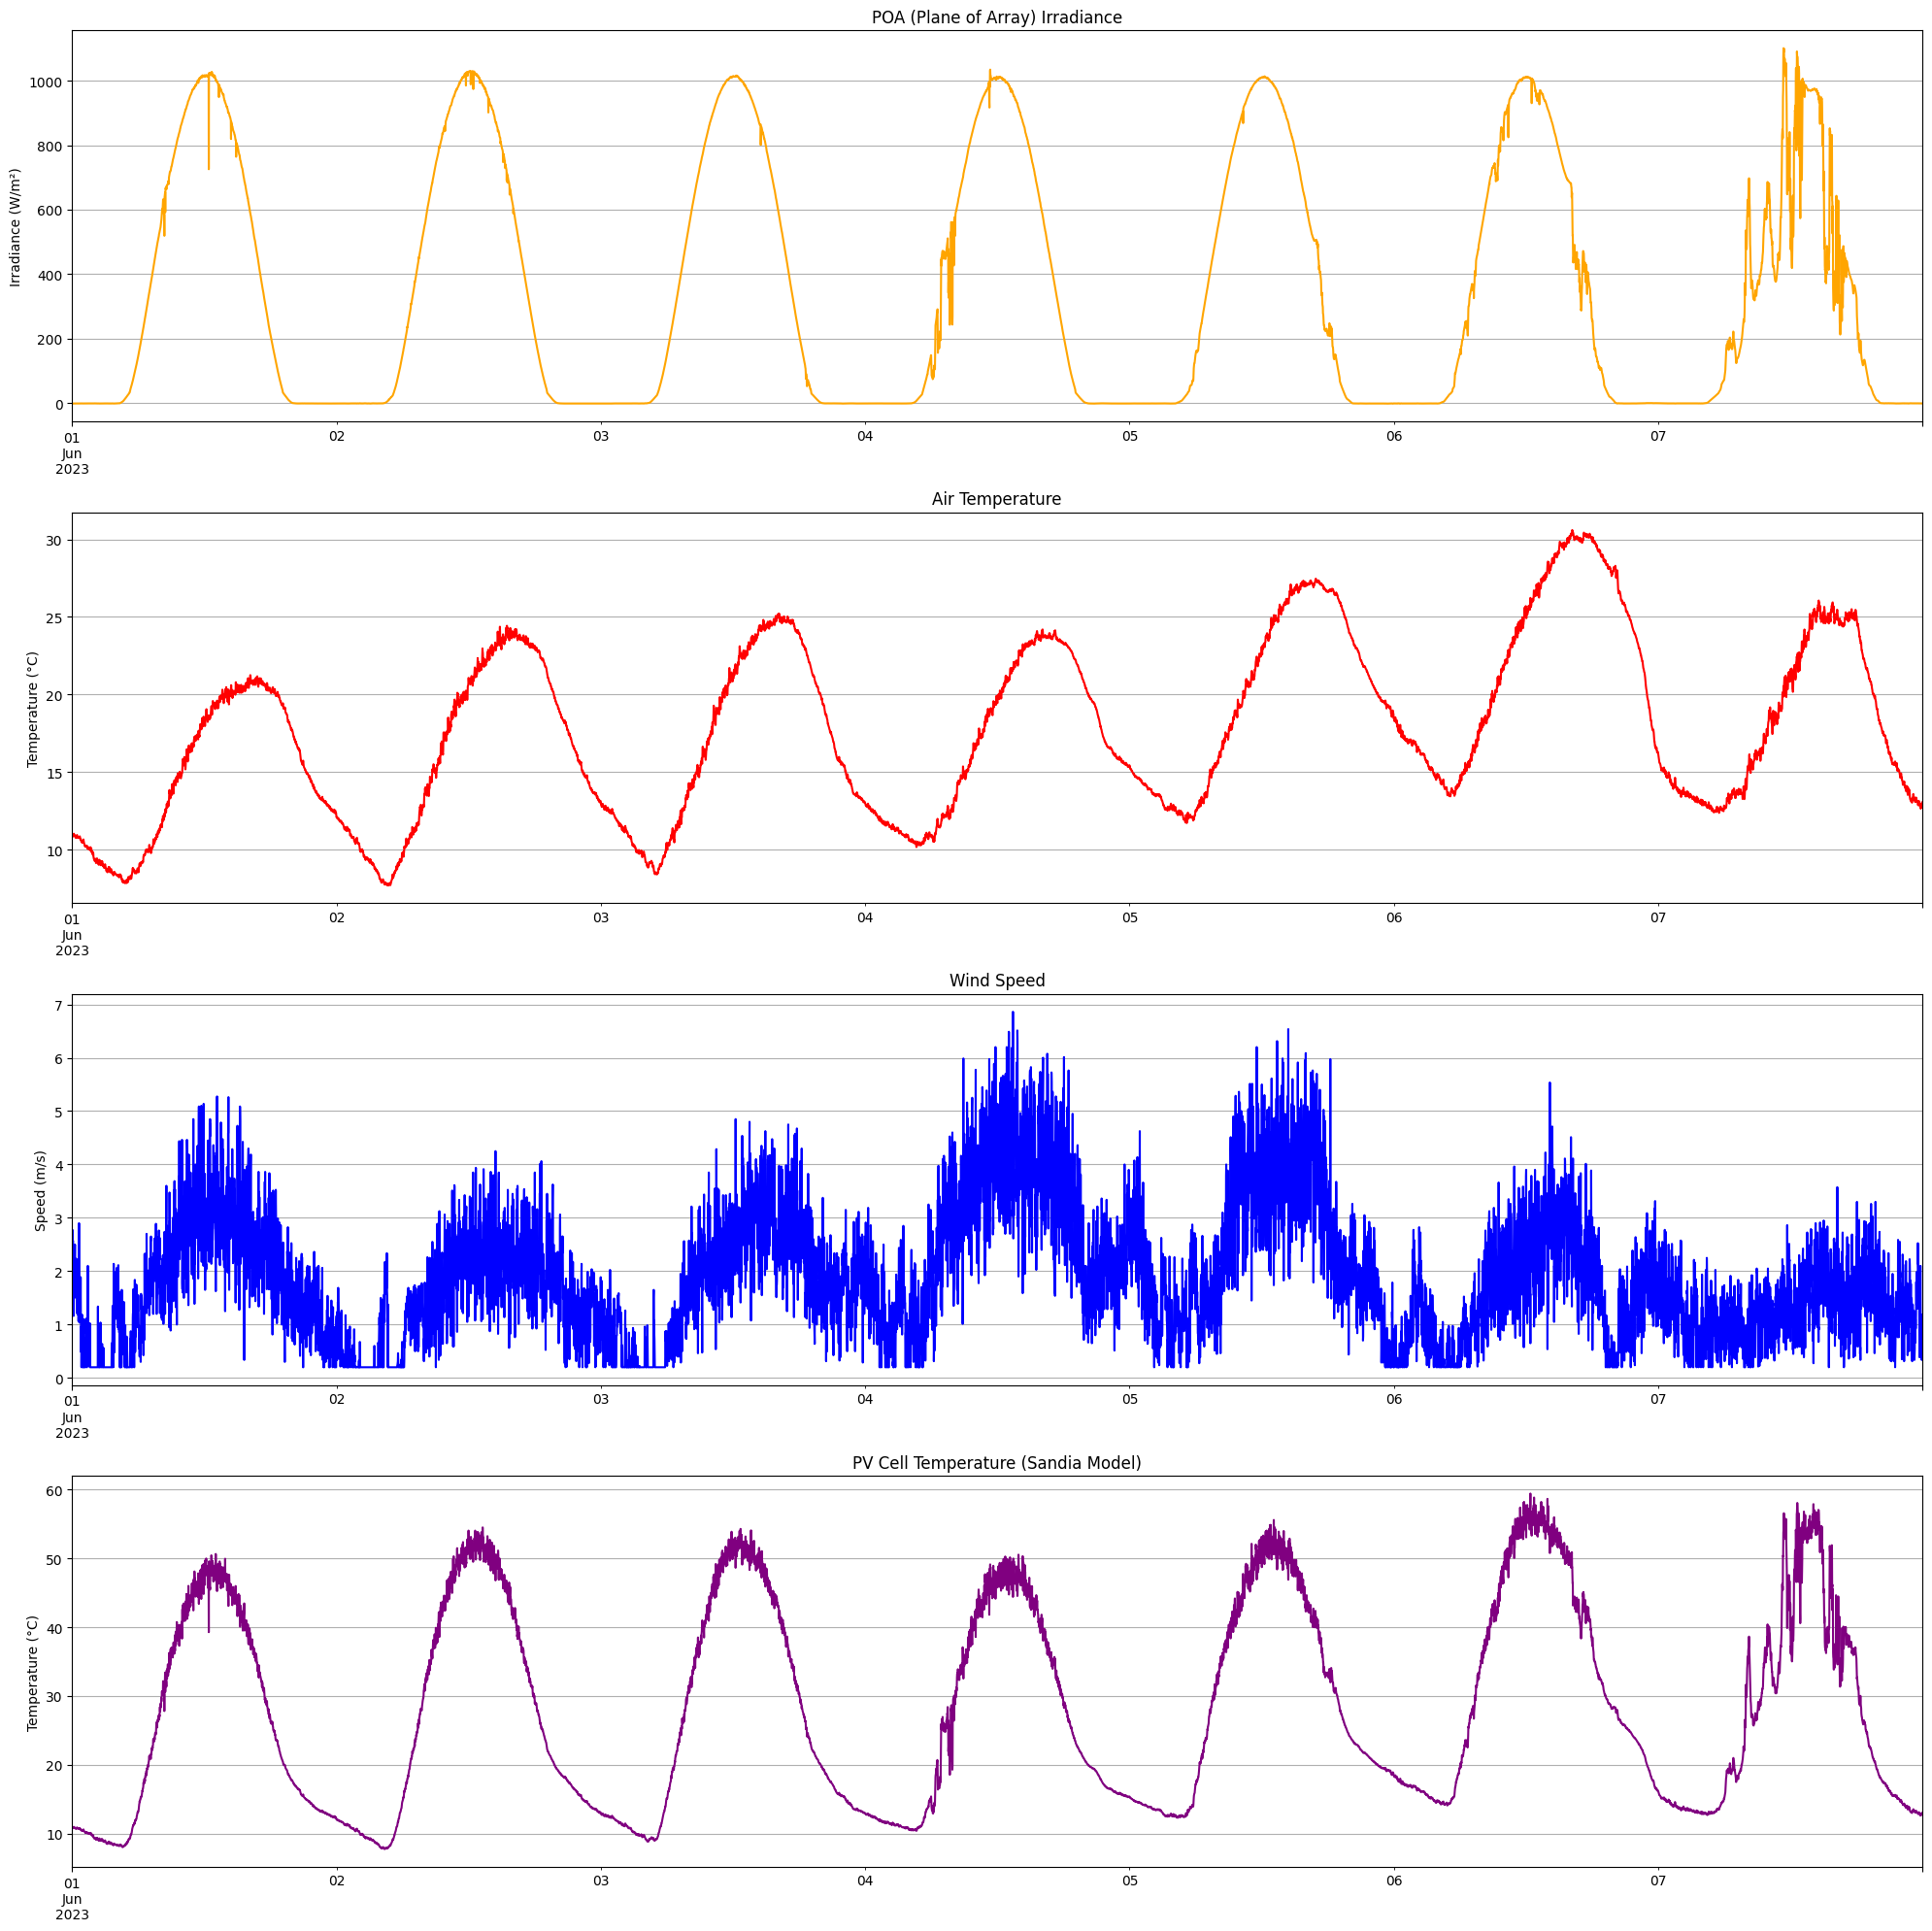

In [73]:
#Influência de Parâmetros para a Modelagem de Temperatura
#Pedir para plotarem os gráficos com
import matplotlib.pyplot as plt

# Criar figura com 4 subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))

# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.4)

# Gráfico 1: poa.plot()
poa.plot(ax=axes[0], title='POA (Plane of Array) Irradiance', color='orange')
axes[0].set_ylabel('Irradiance (W/m²)')
axes[0].grid(True)

# Gráfico 2: Temperatura do ar
df_weather['temp_air'].plot(ax=axes[1], title='Air Temperature', color='red')
axes[1].set_ylabel('Temperature (°C)')
axes[1].grid(True)

# Gráfico 3: Velocidade do vento
df_weather['wind_speed'].plot(ax=axes[2], title='Wind Speed', color='blue')
axes[2].set_ylabel('Speed (m/s)')
axes[2].grid(True)

# Gráfico 4: Temperatura da célula PV
PV_Cell_Temperature_Sandia = pvlib.temperature.sapm_cell(poa_global = poa, temp_air = df_weather['temp_air'], wind_speed = df_weather['wind_speed'], a = -3.47, b = -0.0594, deltaT = 3, irrad_ref=1000.0)
PV_Cell_Temperature_Sandia.plot(ax=axes[3], title='PV Cell Temperature (Sandia Model)', color='purple')
axes[3].set_ylabel('Temperature (°C)')
axes[3].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

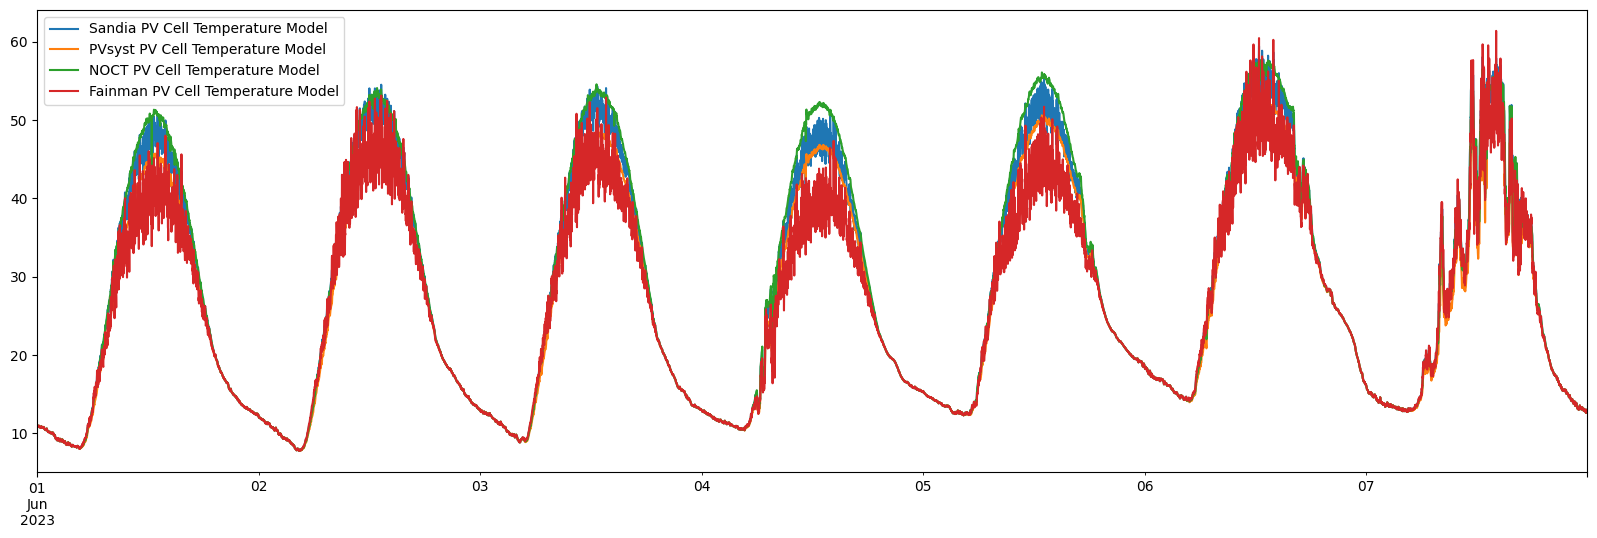

In [74]:
PV_Cell_Temperature_PVsyst = pvlib.temperature.pvsyst_cell(poa_global = poa, temp_air = df_weather['temp_air'], wind_speed = df_weather['wind_speed'], u_c = 29.0, u_v=0.0, module_efficiency=0.1701, alpha_absorption=0.9)
PV_Cell_Temperature_NOCT = pvlib.temperature.ross(poa_global = poa, temp_air = df_weather['temp_air'], noct = 45)
PV_Cell_Temperature_Fainman = pvlib.temperature.faiman(poa_global = poa, temp_air = df_weather['temp_air'], wind_speed= df_weather['wind_speed'], u0=25.0, u1=6.84)
PV_Cell_Temperature_Sandia.plot(label='Sandia PV Cell Temperature Model', figsize = (20,6))
PV_Cell_Temperature_PVsyst.plot(label='PVsyst PV Cell Temperature Model')
PV_Cell_Temperature_NOCT.plot(label='NOCT PV Cell Temperature Model')
PV_Cell_Temperature_Fainman.plot(label = 'Fainman PV Cell Temperature Model')
plt.legend()

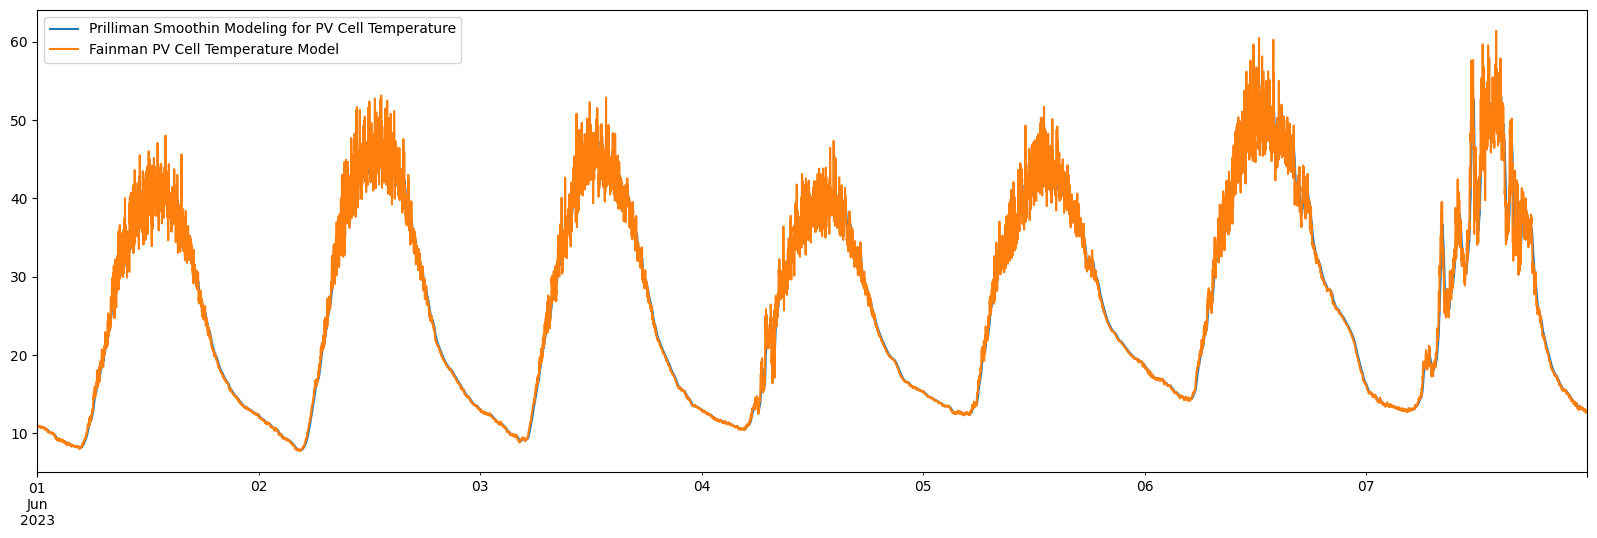

In [75]:
# Suavização da Modelagem de Temperatura pelo Modelo de Prilliman
PV_Cell_Prilliman = pvlib.temperature.prilliman(PV_Cell_Temperature_Fainman, df_weather['wind_speed'], unit_mass=11.1, coefficients=None)
PV_Cell_Prilliman.plot(label = 'Prilliman Smoothin Modeling for PV Cell Temperature', figsize=(20,6))
PV_Cell_Temperature_Fainman.plot(label='Fainman PV Cell Temperature Model', figsize = (20,6))
plt.legend()

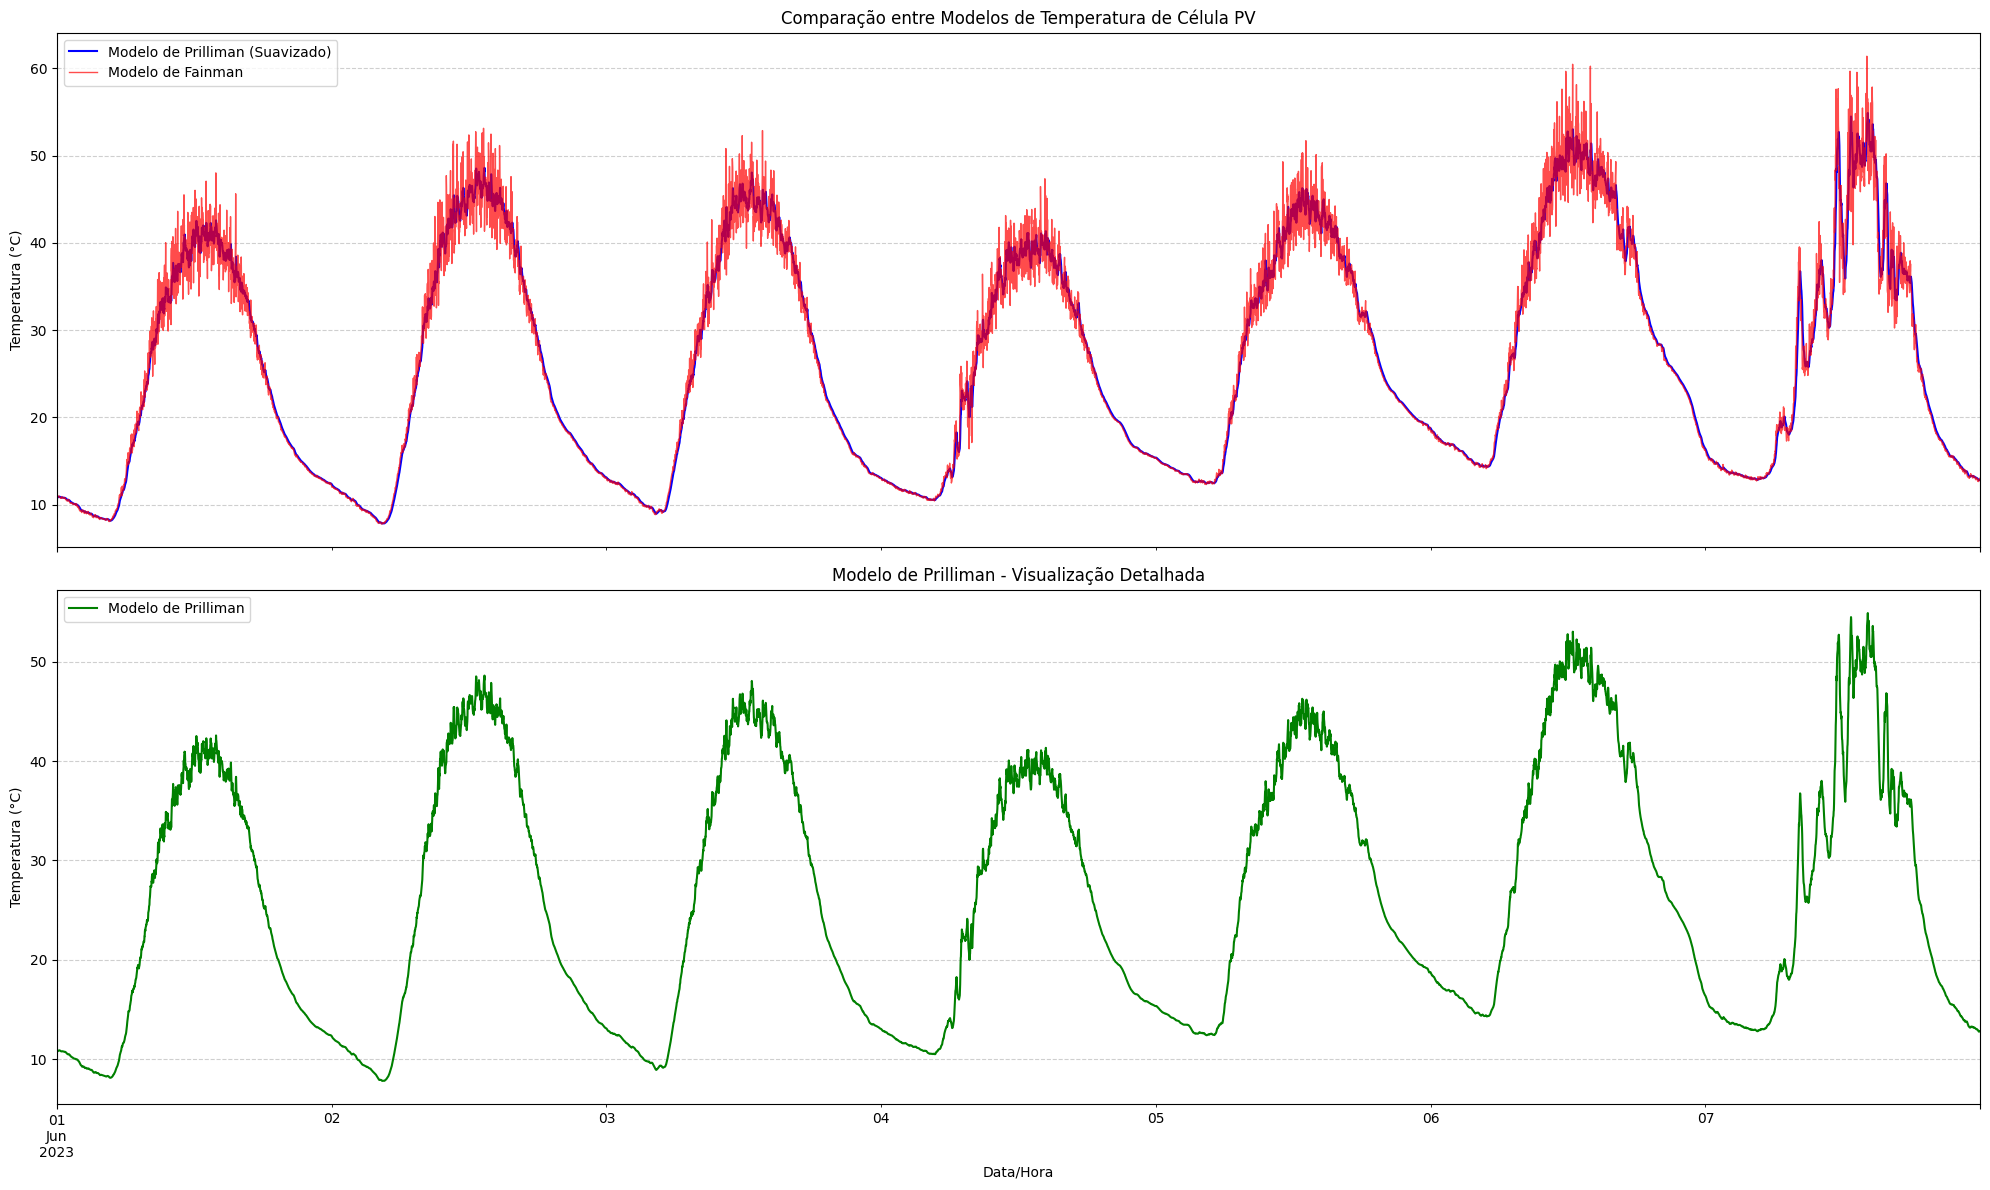

In [76]:
import matplotlib.pyplot as plt

# Criando figura com 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), sharex=True)

# Subplot 1 - Comparação entre os dois modelos
PV_Cell_Prilliman.plot(ax=ax1, label='Modelo de Prilliman (Suavizado)', color='blue', linewidth=1.5)
PV_Cell_Temperature_Fainman.plot(ax=ax1, label='Modelo de Fainman', color='red', linewidth=1, alpha=0.7)
ax1.set_ylabel('Temperatura (°C)')
ax1.set_title('Comparação entre Modelos de Temperatura de Célula PV')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# Subplot 2 - Apenas o modelo Prilliman com mais detalhes
PV_Cell_Prilliman.plot(ax=ax2, label='Modelo de Prilliman', color='green', linewidth=1.5)
ax2.set_ylabel('Temperatura (°C)')
ax2.set_title('Modelo de Prilliman - Visualização Detalhada')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

# Ajustes finais
plt.xlabel('Data/Hora')
plt.tight_layout()
plt.show()

Simulando a Potência Gerada

<Axes: >

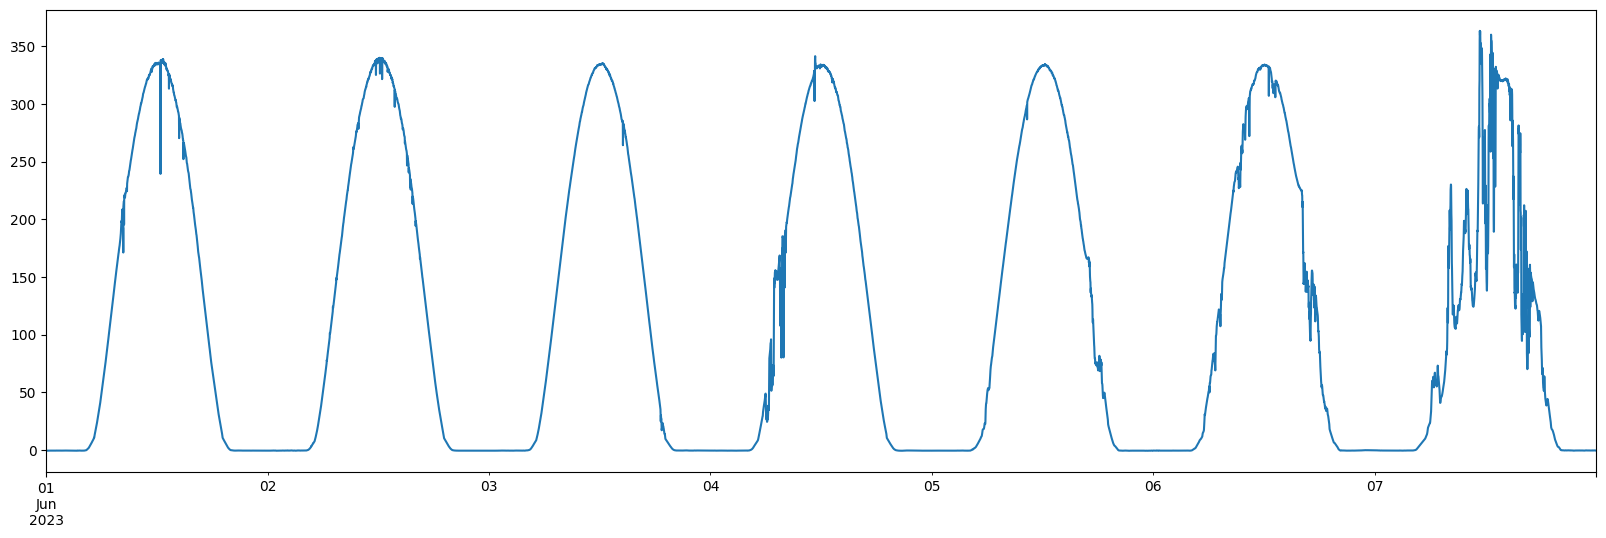

In [77]:
#Sem influência da Temperatura
P_gen = eff_ref * A_c * poa
P_gen.plot(figsize=(20,6))

<Axes: >

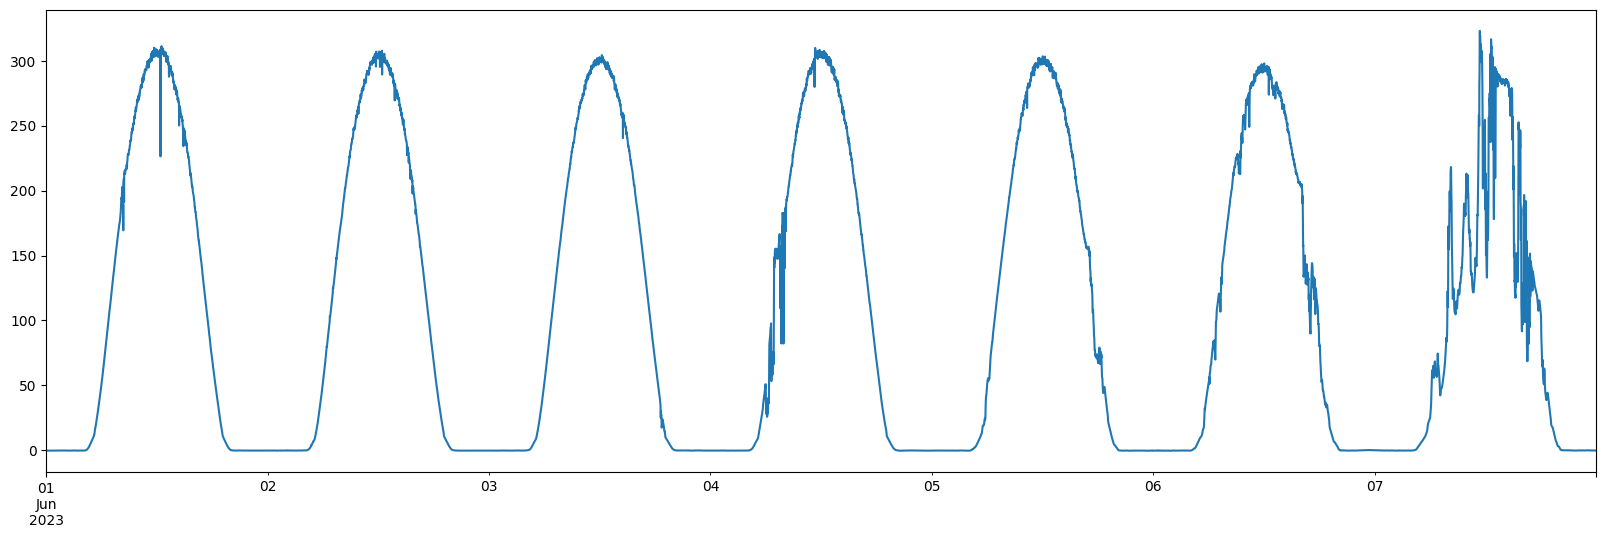

In [78]:
#Com influência da Temperatura (deixa o pessoal fazer)
P_gen_temp = eff_ref * A_c * poa * (1 + (-0.0038)*(PV_Cell_Temperature_Sandia - 25))
P_gen_temp.plot(figsize=(20,6))

<Axes: >

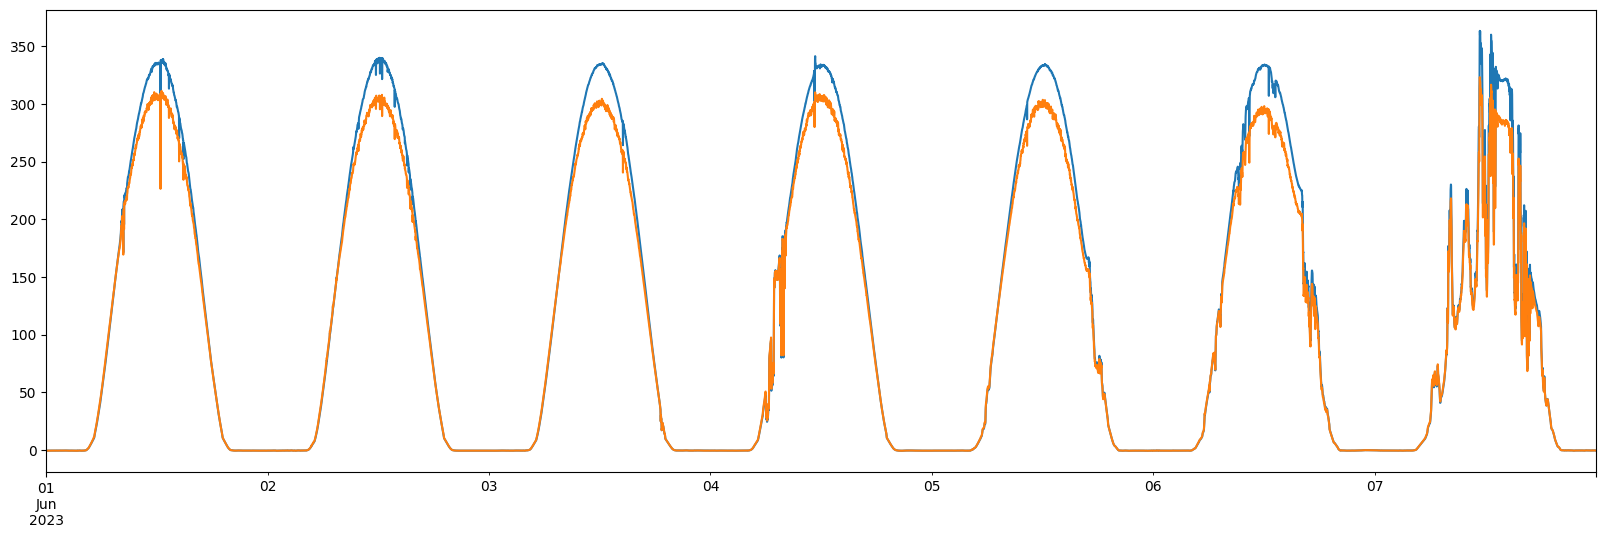

In [79]:
P_gen.plot(figsize=(20,6))
P_gen_temp.plot(figsize=(20,6))


ESTATÍSTICAS DAS PERDAS (APENAS QUANDO POA > 0):
                         Métrica    Valor                                   Descrição
            Perda Absoluta Média  12.26 W                   Média das perdas em Watts
          Perda Percentual Média    3.88%             Média das perdas em porcentagem
           Perda Máxima Absoluta  44.55 W             Máxima perda absoluta observada
         Perda Máxima Percentual   13.08%           Máxima perda percentual observada
Temperatura Média durante perdas 35.22 °C Temperatura média durante períodos de perda

Correlação entre Temperatura e Perda Percentual: 1.000
Forte correlação positiva


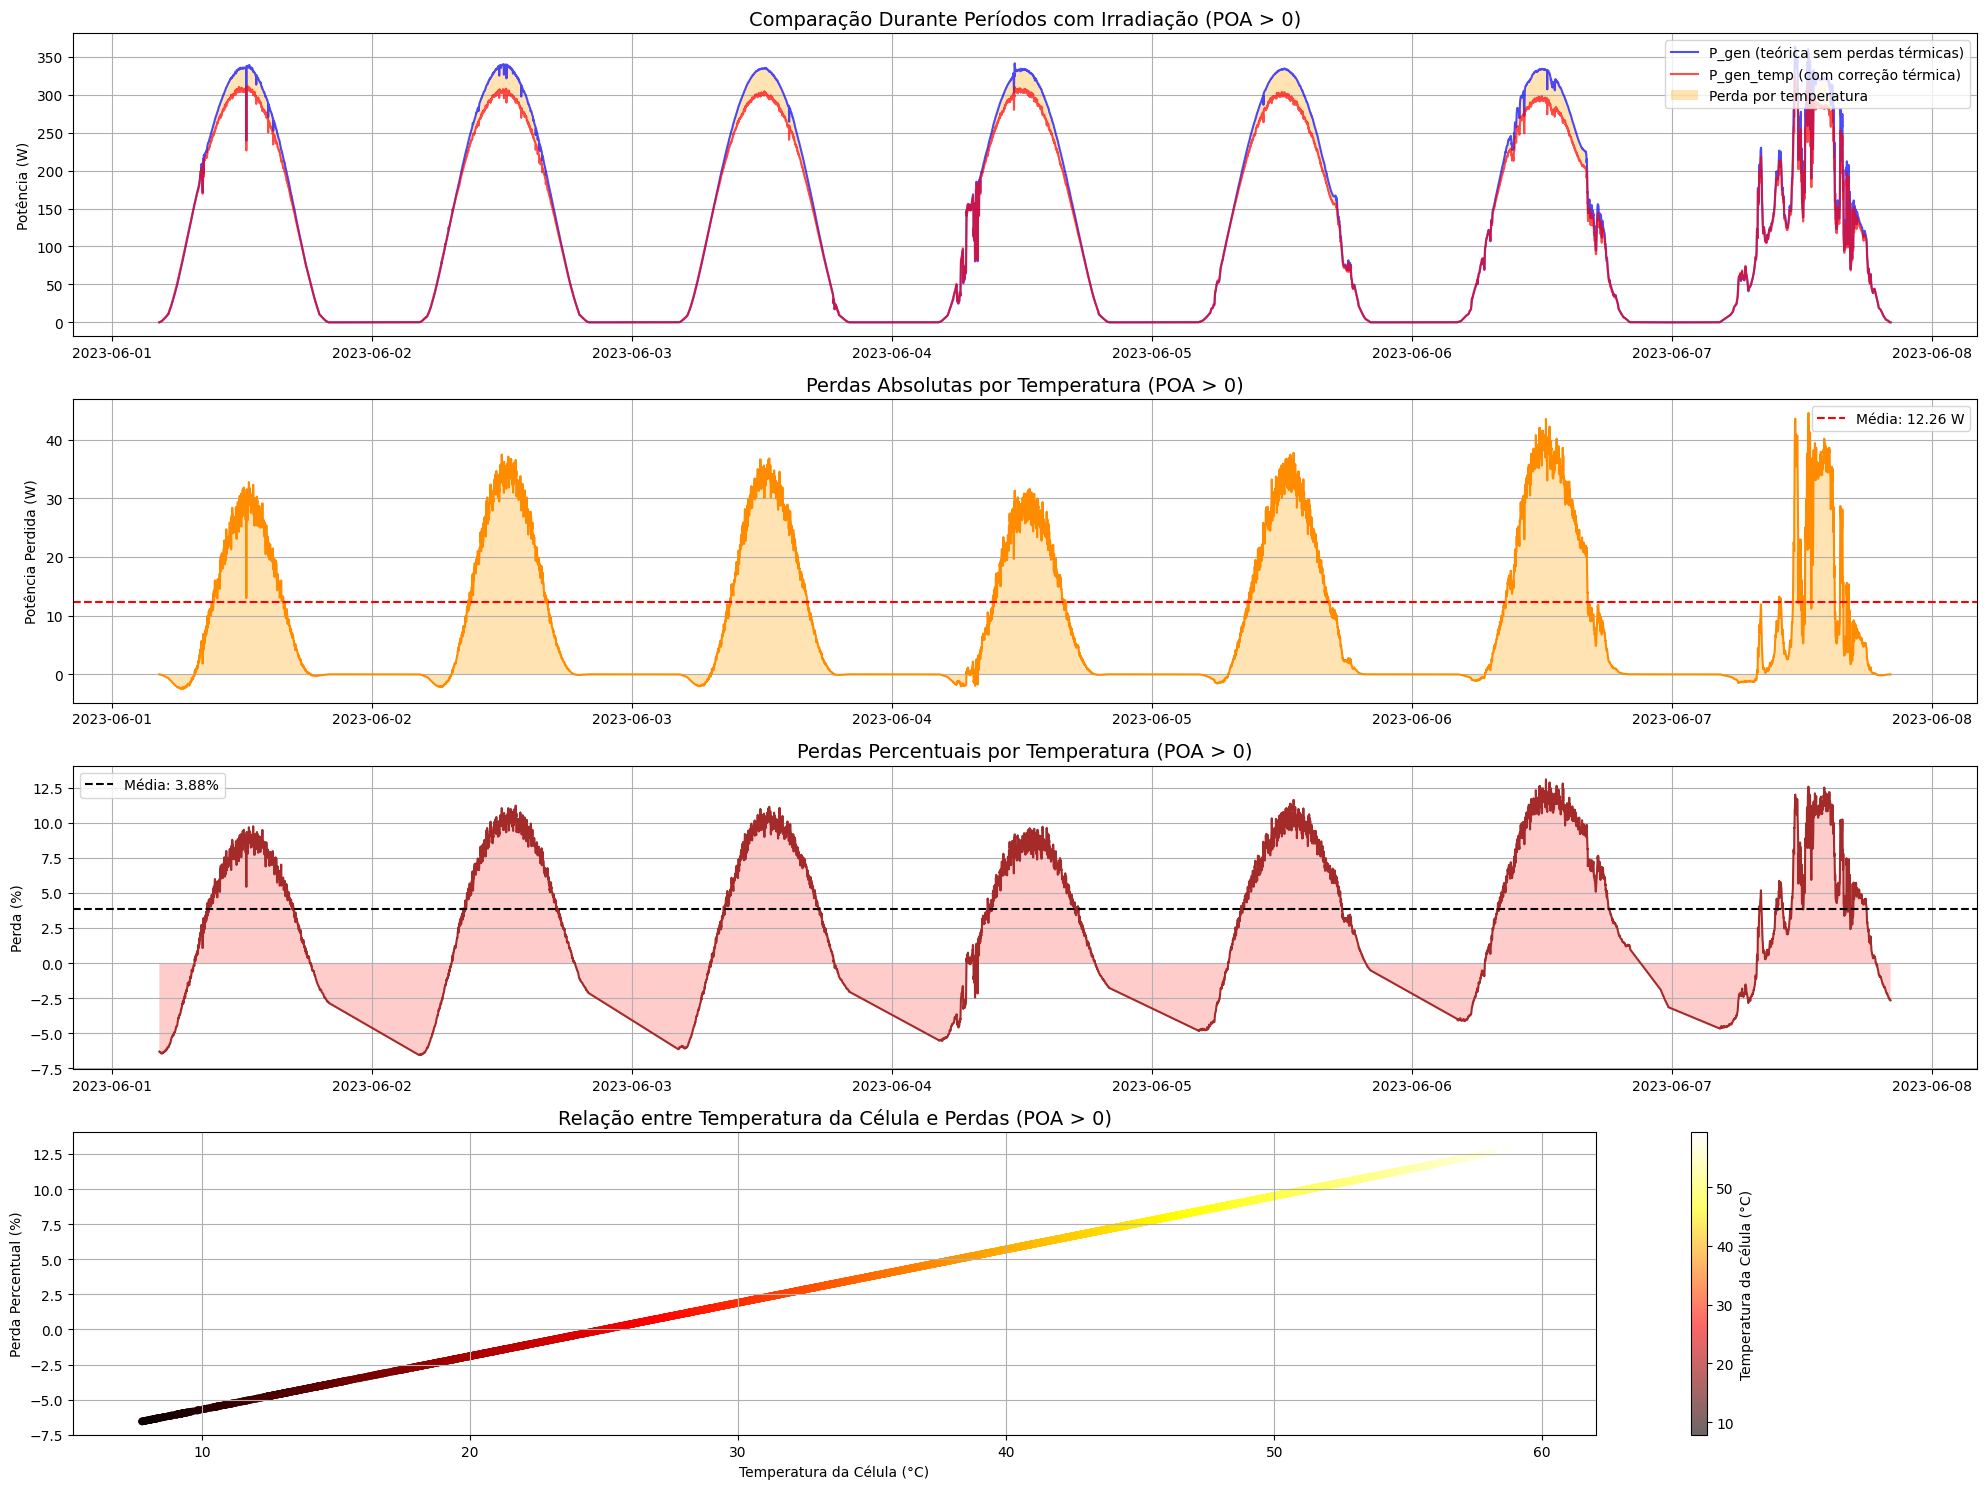

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Criar máscara para momentos com irradiação
active_mask = (poa > 0) & (P_gen.notna()) & (P_gen_temp.notna())

# Aplicar a máscara a todas as séries
P_gen_active = P_gen[active_mask]
P_gen_temp_active = P_gen_temp[active_mask]
PV_temp_active = PV_Cell_Temperature_Sandia[active_mask]

# Calcular perdas somente onde há irradiação
thermal_loss = P_gen_active - P_gen_temp_active
thermal_loss_percentage = (thermal_loss / P_gen_active) * 100

# Configuração do gráfico
plt.figure(figsize=(20, 15))

# 1. Gráfico Comparativo (apenas com irradiação)
plt.subplot(4, 1, 1)
plt.plot(P_gen_active, label='P_gen (teórica sem perdas térmicas)', color='blue', alpha=0.7)
plt.plot(P_gen_temp_active, label='P_gen_temp (com correção térmica)', color='red', alpha=0.7)

# Destacar perdas
plt.fill_between(P_gen_active.index, P_gen_temp_active, P_gen_active,
                 where=(P_gen_active > P_gen_temp_active),
                 facecolor='orange', alpha=0.3,
                 label='Perda por temperatura')

plt.title('Comparação Durante Períodos com Irradiação (POA > 0)', fontsize=14)
plt.ylabel('Potência (W)')
plt.legend()
plt.grid(True)

# 2. Perdas Absolutas
plt.subplot(4, 1, 2)
plt.plot(thermal_loss, color='darkorange')
plt.fill_between(thermal_loss.index, 0, thermal_loss, facecolor='orange', alpha=0.3)
plt.axhline(y=thermal_loss.mean(), color='red', linestyle='--',
            label=f'Média: {thermal_loss.mean():.2f} W')
plt.title('Perdas Absolutas por Temperatura (POA > 0)', fontsize=14)
plt.ylabel('Potência Perdida (W)')
plt.legend()
plt.grid(True)

# 3. Perdas Percentuais
plt.subplot(4, 1, 3)
plt.plot(thermal_loss_percentage, color='brown')
plt.fill_between(thermal_loss_percentage.index, 0, thermal_loss_percentage,
                 facecolor='red', alpha=0.2)
plt.axhline(y=thermal_loss_percentage.mean(), color='black', linestyle='--',
            label=f'Média: {thermal_loss_percentage.mean():.2f}%')
plt.title('Perdas Percentuais por Temperatura (POA > 0)', fontsize=14)
plt.ylabel('Perda (%)')
plt.legend()
plt.grid(True)

# 4. Relação Temperatura-Perda
plt.subplot(4, 1, 4)
sc = plt.scatter(PV_temp_active, thermal_loss_percentage,
                c=PV_temp_active, cmap='hot', alpha=0.6, s=20)
plt.colorbar(sc, label='Temperatura da Célula (°C)')
plt.xlabel('Temperatura da Célula (°C)')
plt.ylabel('Perda Percentual (%)')
plt.title('Relação entre Temperatura da Célula e Perdas (POA > 0)', fontsize=14)
plt.grid(True)

plt.tight_layout()

# Estatísticas filtradas
stats_df = pd.DataFrame({
    'Métrica': ['Perda Absoluta Média', 'Perda Percentual Média',
               'Perda Máxima Absoluta', 'Perda Máxima Percentual',
               'Temperatura Média durante perdas'],
    'Valor': [f"{thermal_loss.mean():.2f} W",
              f"{thermal_loss_percentage.mean():.2f}%",
              f"{thermal_loss.max():.2f} W",
              f"{thermal_loss_percentage.max():.2f}%",
              f"{PV_temp_active.mean():.2f} °C"],
    'Descrição': ['Média das perdas em Watts',
                 'Média das perdas em porcentagem',
                 'Máxima perda absoluta observada',
                 'Máxima perda percentual observada',
                 'Temperatura média durante períodos de perda']
})

print("\nESTATÍSTICAS DAS PERDAS (APENAS QUANDO POA > 0):")
print(stats_df.to_string(index=False))

# Análise de correlação
if len(PV_temp_active) > 1:
    correlation = np.corrcoef(PV_temp_active, thermal_loss_percentage)[0, 1]
    print(f"\nCorrelação entre Temperatura e Perda Percentual: {correlation:.3f}")
    if correlation > 0.7:
        print("Forte correlação positiva")
    elif correlation > 0.3:
        print("Moderada correlação positiva")

Cálculo de um Sistema FV (Modelo do PVWatts e Perdas do Sistema)

0.8592433931173553


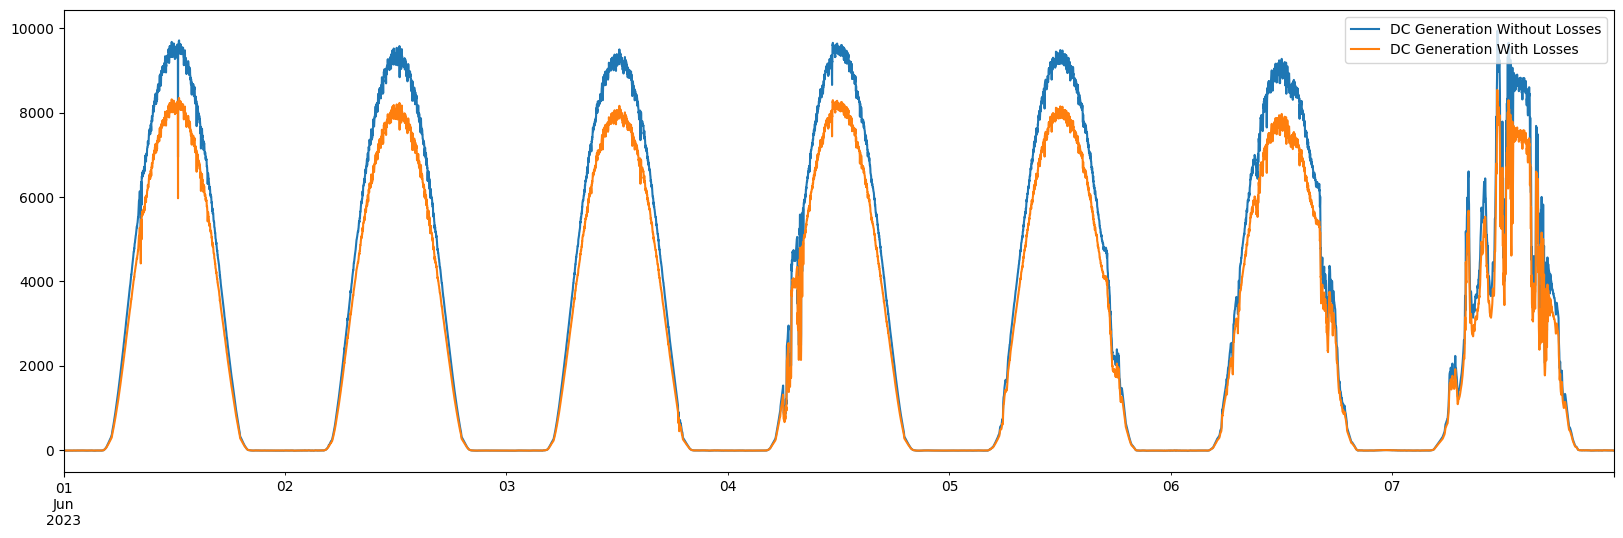

In [81]:
NModules = 30

#Fazer a modelagem com a temperatura da célula modelada pelo modelo de Fainman e depois refinada com Prilliman
PVWatts_Gen = pvlib.pvsystem.pvwatts_dc(g_poa_effective = poa, temp_cell = PV_Cell_Temperature_Fainman, pdc0 = Imp*Vmp, gamma_pdc = -0.0038, temp_ref=25.0)*NModules

PVWatts_Losses = pvlib.pvsystem.pvwatts_losses(soiling=2, shading=3, snow=0,
                                               mismatch=2, wiring=2, connections=0.5,
                                               lid=1.5, nameplate_rating=1, age=0,
                                               availability=3)

PVWatts_Gen_Losses = PVWatts_Gen*(100 - PVWatts_Losses)/100

plt.figure(figsize=(20,6))
PVWatts_Gen.plot(label = 'DC Generation Without Losses')
PVWatts_Gen_Losses.plot(label = 'DC Generation With Losses')
plt.legend()

print((100 - PVWatts_Losses)/100)
